In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)


In [2]:
# reading the data using pandas. i already sort the csv file in the same directory file of my python.

df = pd.read_csv("movies.csv") 

In [4]:
for column in df.columns:
    null_count = df[column].isnull().sum() ### for loop for checking any null values in the columns
    
    if null_count > 0:
        print(f"Column '{column}' has {null_count} null values.") ### using print statement to get the result in a manner of text
    else:
        print(f"Column '{column}' has no null values.")

Column 'name' has no null values.
Column 'rating' has 77 null values.
Column 'genre' has no null values.
Column 'year' has no null values.
Column 'released' has 2 null values.
Column 'score' has 3 null values.
Column 'votes' has 3 null values.
Column 'director' has no null values.
Column 'writer' has 3 null values.
Column 'star' has 1 null values.
Column 'country' has 3 null values.
Column 'budget' has 2171 null values.
Column 'gross' has 189 null values.
Column 'company' has 17 null values.
Column 'runtime' has 4 null values.


In [5]:
# dropping null values

df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [7]:
## changing the data type of budget and gross column from float64 into int64

df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


In [9]:
df["country"]

0       United Kingdom
1        United States
2        United States
3        United States
4        United States
             ...      
7648     United States
7649     United States
7650     United States
7651            Canada
7652             China
Name: country, Length: 5421, dtype: object

In [11]:
### using regular expression to extract date,month,year from released column

df["released"] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format = '%B %d, %Y')

In [12]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year   released  score      votes         director  \
0     1980 1980-06-13    8.4   927000.0  Stanley Kubrick   
1     1980 1980-07-02    5.8    65000.0   Randal Kleiser   
2     1980 1980-06-20    8.7  1200000.0   Irvin Kershner   
3     1980 1980-07-02    7.7   221000.0     Jim Abrahams   
4     1980 1980-07-25    7.3   108000.0     Harold Ramis   
...    ...        ...    ...        ...              ...   
7648  2020 2020-01-17    6.6   140000.0     Adil El Arbi   
7649  2020 2020-02-14    6.5   102000.0      Jeff Fowler   
7650  2020 2020-01-17    5.6    53000.0   Stephen Gaghan   
7651  2020 2020-02-21    6.8    42000.0    Chris Sanders   
7652  2020 2020-08-28    6.8     3700.0          Hu Guan   

                       writer               star         country     budget  \
0                Stephen King     Jack Nicholson  United Kingdom   19000000   
1     Henry De Vere Stacpoole     Brooke Shields   United States    4500000   
2              Leigh Brackett        Mark Hamill   United States   18000000   
3                Jim Abrahams        Robert Hays   United States    3500000   
4          Brian Doyle-Murray        Chevy Chase   United States    6000000   
...                       ...                ...             ...        ...   
7648              Peter Craig         Will Smith   United States   90000000   
7649                Pat Casey       Ben Schwartz   United States   85000000   
7650           Stephen Gaghan  Robert Downey Jr.   United States  175000000   
7651            Michael Green      Harrison Ford          Canada  135000000   
7652                  Hu Guan    Zhi-zhong Huang           China   80000000   

          gross                              company  runtime  
0      46998772                         Warner Bros.    146.0  
1      58853106                    Columbia Pictures    104.0  
2     538375067                            Lucasfilm    124.0  
3      83453539                   Paramount Pictures     88.0  
4      39846344                       Orion Pictures     98.0  
...         ...                                  ...      ...  
7648  426505244                    Columbia Pictures    124.0  
7649  319715683                   Paramount Pictures     99.0  
7650  245487753                   Universal Pictures    101.0  
7651  111105497                 20th Century Studios    100.0  
7652  461421559  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

In [13]:
# correcting the release year column

df["yearcorrect"] = df["released"].astype(str).str[:4]

In [15]:
# sorting gross column to check the values from the highest to the lowest

df = df.sort_values(by=["gross"], inplace = False, ascending = False)
pd.set_option("display.max_rows", None)

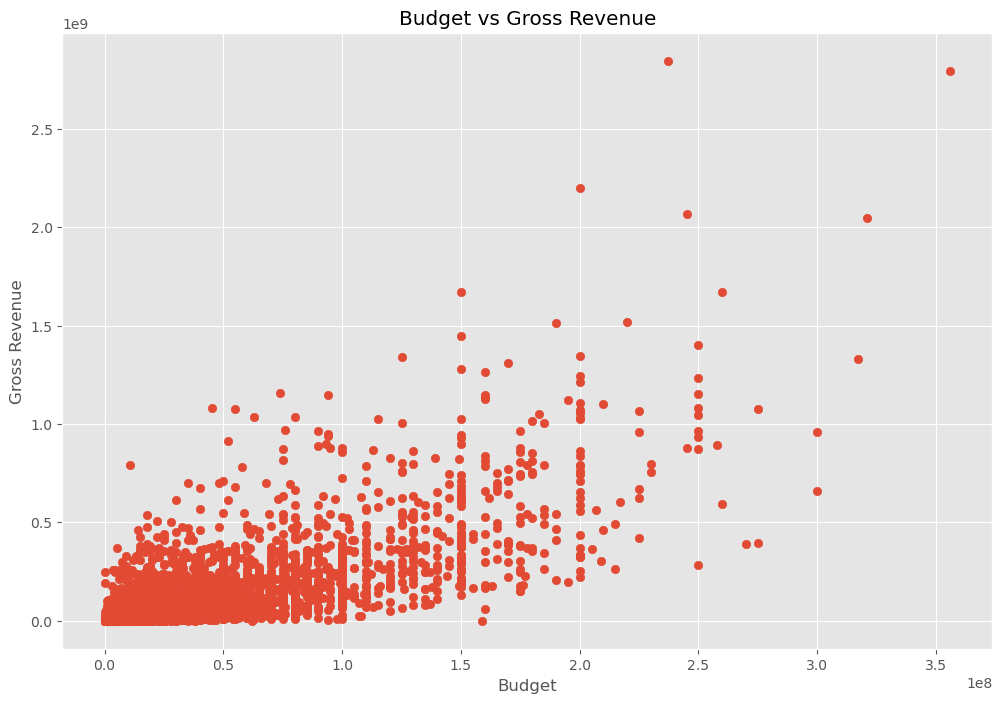

In [16]:
# scatter plot with budget vs gross as a first step to check the correlation between budget and gross revenue

plt.scatter(x = df["budget"], y = df["gross"])
plt.title("Budget vs Gross Revenue")

plt.xlabel("Budget")
plt.ylabel("Gross Revenue")

plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 5445 to 3203
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         5421 non-null   object        
 1   rating       5421 non-null   object        
 2   genre        5421 non-null   object        
 3   year         5421 non-null   int64         
 4   released     5407 non-null   datetime64[ns]
 5   score        5421 non-null   float64       
 6   votes        5421 non-null   float64       
 7   director     5421 non-null   object        
 8   writer       5421 non-null   object        
 9   star         5421 non-null   object        
 10  country      5421 non-null   object        
 11  budget       5421 non-null   int64         
 12  gross        5421 non-null   int64         
 13  company      5421 non-null   object        
 14  runtime      5421 non-null   float64       
 15  yearcorrect  5421 non-null   object        
dtypes: datet

In [19]:
# creating new dataframe that only includes numeric columns so we can use the correlation method

df_numeric = df.select_dtypes(include="number")

In [20]:
correlation_matrix = df_numeric.corr()

In [21]:
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000


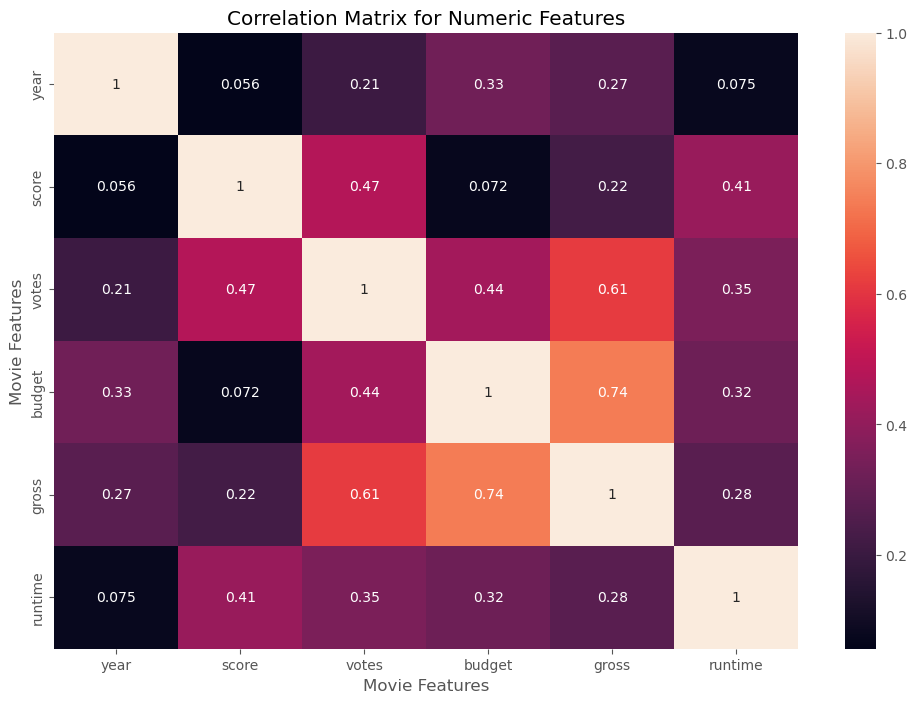

In [22]:
# plotting into heatmap chart to see the correlation between gross revenua and budget

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [23]:
# creating new dataframe to numerize the object column into "category" data type, so we can plot the data and use corr() to see any correlation

df_numerized = df

for col_name in df_numerized:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year   released  score      votes  director  \
5445   386       5      0  2009 2009-12-18    7.8  1100000.0       785   
7445   388       5      0  2019 2019-04-26    8.4   903000.0       105   
3045  4909       5      6  1997 1997-12-19    7.8  1100000.0       785   
6663  3643       5      0  2015 2015-12-18    7.8   876000.0       768   
7244   389       5      0  2018 2018-04-27    8.4   897000.0       105   
7480  4388       4      2  2019 2019-07-19    6.9   222000.0      1012   
6653  2117       5      0  2015 2015-06-12    7.0   593000.0       335   
6043  3878       5      0  2012 2012-05-04    8.0  1300000.0      1060   
6646  1541       5      0  2015 2015-04-03    7.1   370000.0       809   
7494  1530       4      2  2019 2019-11-22    6.8   148000.0       277   
6644   387       5      0  2015 2015-05-01    7.3   777000.0      1060   
7247   567       5      0  2018 2018-02-16    7.3   661000.0      1716   
5845  1731       5      1  2011 2011-07-15    8.1   790000.0       452   
7075  3644       5      0  2017 2017-12-15    7.0   581000.0      1589   
7271  2118       5      0  2018 2018-06-22    6.2   277000.0       764   
6262  1529       4      2  2013 2013-11-27    7.4   585000.0       277   
7072   477       4      7  2017 2017-03-17    7.1   283000.0       155   
7281  1966       4      2  2018 2018-06-15    7.6   263000.0       193   
7055  4119       5      0  2017 2017-04-14    6.6   214000.0       567   
6244  2014       5      0  2013 2013-05-03    7.1   779000.0      1767   
6688  2545       4      2  2015 2015-07-10    6.4   218000.0      1144   
6846   750       5      0  2016 2016-05-06    7.8   694000.0       105   
7250   343       5      0  2018 2018-12-21    6.9   404000.0       809   
4245  4407       5      0  2003 2003-12-17    8.9  1700000.0      1520   
7458  3595       5      0  2019 2019-07-02    7.5   359000.0      1019   
7456   755       5      0  2019 2019-03-08    6.8   478000.0        96   
5878  4950       5      0  2011 2011-06-29    6.2   390000.0      1302   
6059  3498       5      0  2012 2012-11-09    7.7   642000.0      1732   
6494  4949       5      0  2014 2014-06-27    5.6   302000.0      1302   
2448  4388       1      2  1994 1994-06-24    8.5   970000.0      1685   
6047  4048       5      0  2012 2012-07-20    8.4  1600000.0       317   
7463  3640       5      0  2019 2019-12-20    6.5   394000.0       768   
7450  2091       6      5  2019 2019-10-04    8.4  1000000.0      1937   
7488  4936       1      2  2019 2019-06-21    7.7   217000.0      1052   
5685  4935       1      2  2010 2010-06-18    8.2   776000.0      1162   
4852  2985       5      0  2006 2006-07-07    7.3   668000.0       674   
6869  3260       5      0  2016 2016-12-16    7.8   572000.0       615   
7481   206       4      1  2019 2019-05-24    6.9   239000.0       705   
5860  2988       5      0  2011 2011-05-20    6.6   492000.0      1635   
7140  1102       4      2  2017 2017-06-30    6.3   119000.0      1144   
2245  2115       5      0  1993 1993-06-11    8.1   894000.0      1859   
6908  1411       4      2  2016 2016-06-17    7.3   250000.0        81   
3451  3637       4      0  1999 1999-05-19    6.5   748000.0       653   
5667   215       4      1  2010 2010-03-05    6.4   392000.0      1918   
6863  5329       4      2  2016 2016-03-04    8.0   450000.0       239   
6045  4240       5      1  2012 2012-12-14    7.8   773000.0      1520   
3843  1736       4      1  2001 2001-11-16    7.6   685000.0       280   
5243  4047       5      0  2008 2008-07-18    9.0  2400000.0       317   
6311  1101       4      2  2013 2013-07-03    7.3   377000.0      1556   
6905  4322       4      1  2016 2016-04-15    7.4   264000.0      1012   
7051  2107       5      0  2017 2017-12-20    6.9   336000.0       778   
6455  4241       5      1  2014 2014-12-17    7.4   487000.0      1520   
5060  2987       5      0  2007 2007-05-25    7.1   608000.0       674   
6253  4242

In [25]:
correlation_matrix_2 = df_numerized.corr()

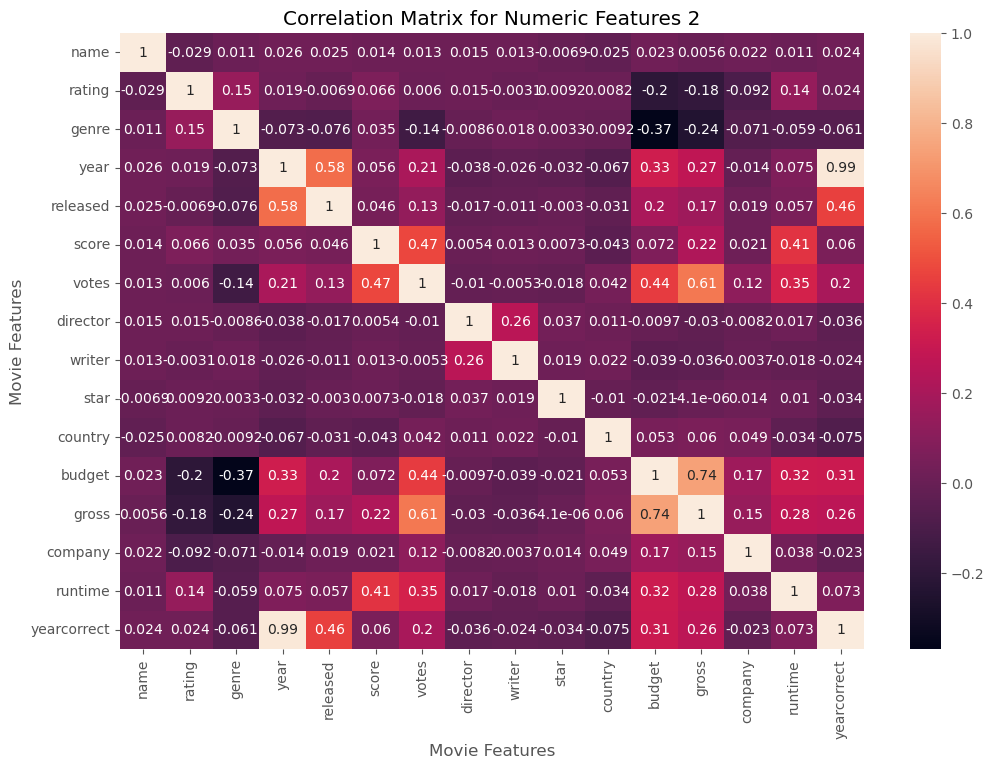

In [28]:
# plotting again the correlation_matrix_2 into heatmap chart
sns.heatmap(correlation_matrix_2, annot = True)
plt.title("Correlation Matrix for Numeric Features 2")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [32]:
# unstacking the matrix so we can see the matrix in a tidy way
corr_pairs = correlation_matrix_2.unstack()


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [34]:
sorted_pairs = corr_pairs.sort_values(ascending=True)
sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
budget       rating        -0.203946
rating       budget        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
released     genre         -0.075551
genre        released      -0.075551
country      yearcorrect   -0.074546
yearcorrect  country       -0.074546
year         genre         -0.073167
genre        year          -0.073167
company      genre         -0.071334
genre        company       -0.071334
year         country       -0.066748
country      year          -0.066748
yearcorrect  genre         -0.061186
genre        yearcorrect   -0.061186
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
c

In [35]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

the purpose of the variable correlation_matrix_2 is for looking the correlation between revenue and the company, which turnout both variable have low correlation. this project is made to practice my python skill for data analysis